In [2]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
#Load the data
df = pd.read_csv('LKOH.csv')
df.shape

(250, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-02,5366.0,5506.0,5342.0,5475.0,4964.382324,843920
1,2019-09-03,5452.0,5469.0,5371.0,5419.0,4913.605469,667867
2,2019-09-04,5434.5,5476.0,5426.5,5450.0,4941.714355,683721
3,2019-09-05,5460.0,5549.5,5460.0,5524.5,5009.266113,794565
4,2019-09-06,5525.5,5555.0,5465.0,5526.5,5011.079102,692582


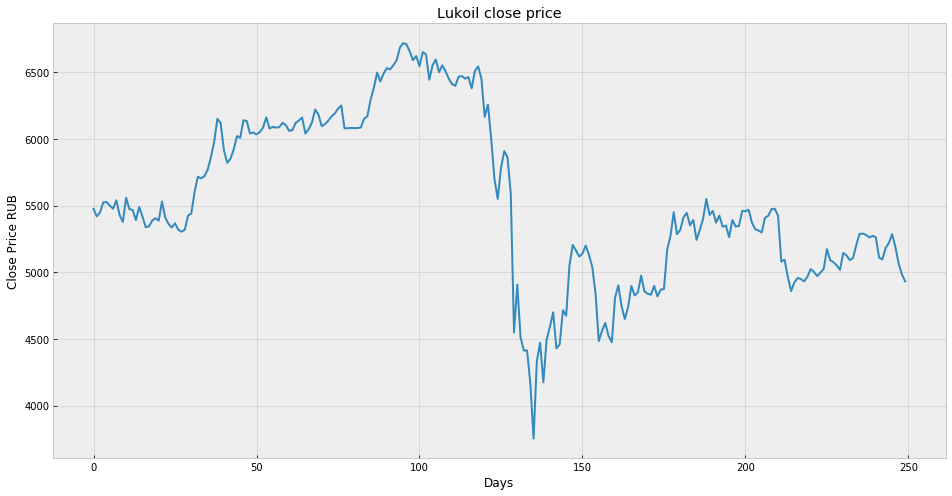

In [6]:
#Visualize the close price data
plt.figure(figsize=(16, 8))
plt.title('Lukoil close price')
plt.xlabel('Days')
plt.ylabel('Close Price RUB')
plt.plot(df['Close'])
plt.show()

In [7]:
#Get the close price
df = df[['Close']]
df.head()

,Close
0,5475.0
1,5419.0
2,5450.0
3,5524.5
4,5526.5


In [9]:
#Create a variable to predict 'x' days out imto future
future_days = 25
#Create a target column (shifted 'x' days up)
df['Prediction'] = df[['Close']].shift(-future_days)
df.head()

,Close,Prediction
0,5475.0,5367.0
1,5419.0,5320.0
2,5450.0,5304.0
3,5524.5,5318.5
4,5526.5,5425.0


In [12]:
#Create the future data set (X) and convert it to a numpy array and remove the last 'X' days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]

In [13]:
#Create the target dataset (y) and convert it to a numpy array and get all of the target values
y = np.array(df['Prediction'])[:-future_days]

In [14]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Create the models
#Decision tree regressor
tree = DecisionTreeRegressor().fit(X_train, y_train)
#Linear regression
lr = LinearRegression().fit(X_train, y_train)

In [16]:
#Get the last 'x' rows of the feature data set
X_future = df.drop(['Prediction'], 1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)

In [17]:
#Show the model tree prediction
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[4973.75 5976.   5075.5  5051.5  5018.   5144.5  5127.   5288.   5107.
 5204.   5288.   5289.5  5280.   5220.   5350.   5262.5  5110.   5096.
 5181.5  5220.   4932.   5190.   5342.   4984.5  4932.  ]

[5516.65774931 5521.87874237 5475.83907632 5453.29387903 5448.31020384
 5441.42798572 5493.87523415 5500.75745227 5524.25192103 5525.91314609
 5500.99477014 5337.72007818 5344.6022963  5283.13696895 5232.82558131
 5263.43958605 5279.33988309 5275.54279723 5267.47398978 5283.37428681
 5311.37779503 5301.41044465 5286.22210121 5298.56263025 5311.14047716]


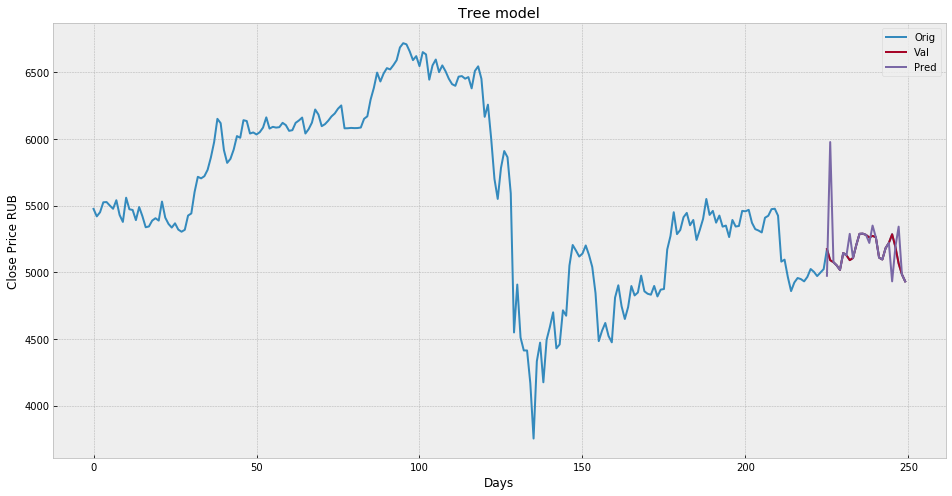

In [19]:
#Visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Tree model')
plt.xlabel('Days')
plt.ylabel('Close Price RUB')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

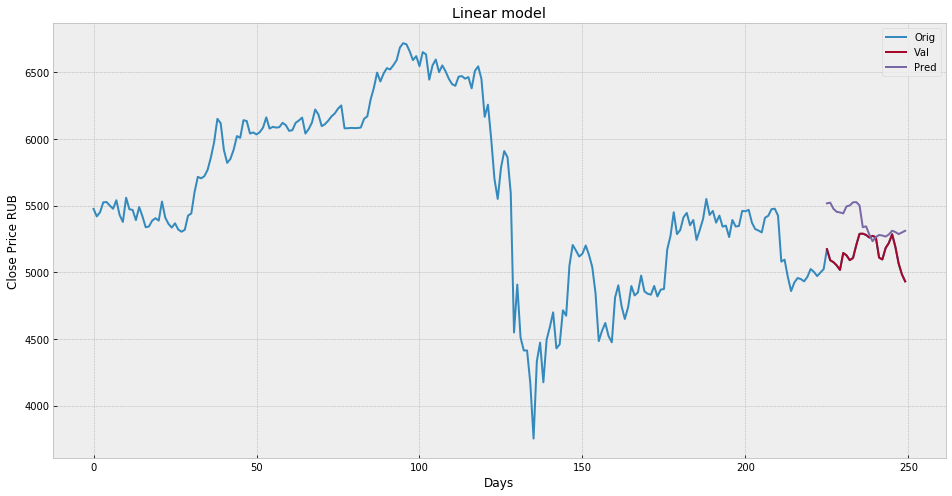

In [21]:
#Visualize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Linear model')
plt.xlabel('Days')
plt.ylabel('Close Price RUB')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()